In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_base = pd.read_csv('/work/bestsellers with categories.csv')

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## Visión general del Data Set

In [ ]:
df_base.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [ ]:
df_base.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [ ]:
df_base.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## Análisis unidimensional de las variables

In [ ]:
df_base['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition                                     10
StrengthsFinder 2.0                                                                                            9
Oh, the Places You'll Go!                                                                                      8
The Very Hungry Caterpillar                                                                                    7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                                   7
                                                                                                              ..
Fifty Shades Freed: Book Three of the Fifty Shades Trilogy (Fifty Shades of Grey Series) (English Edition)     1
The Alchemist                                                                                                  1
The Paris Wife: A Novel                                                                         

In [ ]:
df_base['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [ ]:
Genre = df_base['Genre'].value_counts(normalize=True)
Genre

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [ ]:
len(df_base['Name'])

550

In [ ]:
len(df_base['Name'].unique())

351

## Análisis multidimensional de las variables

### •	¿Cuál es el libro que ha tenido la mayor cantidad de reviews de todos los años?

In [ ]:
los_mejores = df_base.groupby('Year').sum()['Reviews']
los_mejores

Year
2009    235506
2010    273981
2011    405041
2012    654546
2013    654907
2014    792997
2015    711669
2016    709800
2017    644420
2018    696521
2019    794917
Name: Reviews, dtype: int64

Text(0, 0.5, 'Reviews')

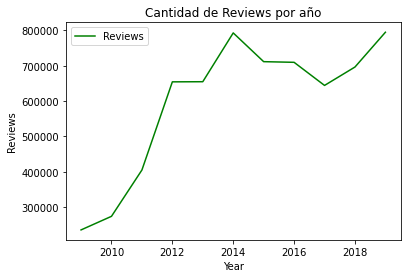

In [ ]:
los_mejores.reset_index().sort_values(by='Year', ascending=False).iloc[0:11].plot(x='Year', y='Reviews', color='green')
plt.title('Cantidad de Reviews por año')
plt.ylabel('Reviews')

### •	¿En promedio, cuánto cuestan los libros?

In [ ]:
promedio_precio = df_base.groupby('Year').mean()['Price']

Text(0, 0.5, 'Price')

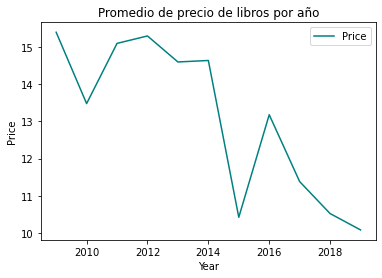

In [ ]:
promedio_precio.reset_index().sort_values(by='Year', ascending=False).plot(x='Year', y='Price', color='teal')
plt.title('Promedio de precio de libros por año')
plt.ylabel('Price')

### •	¿Cuál es el libro que ha tenido la mayor cantidad de reviews de todos los años?

In [ ]:
top_libros = df_base.groupby('Name')['Reviews'].max()
print(top_libros.sort_values(ascending=False).head(10))

Name
Where the Crawdads Sing                                                                     87841
The Girl on the Train                                                                       79446
Becoming                                                                                    61133
Gone Girl                                                                                   57271
The Fault in Our Stars                                                                      50482
The Nightingale: A Novel                                                                    49288
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)    47265
The Martian                                                                                 39459
All the Light We Cannot See                                                                 36348
The Alchemist                                                                               35799
Name: Reviews, 

In [ ]:
libro = df_base[(df_base.Name=='Where the Crawdads Sing')]
libro

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Text(0.5, 1.0, 'Top 10: Libros con mayor cantidad de reviews')

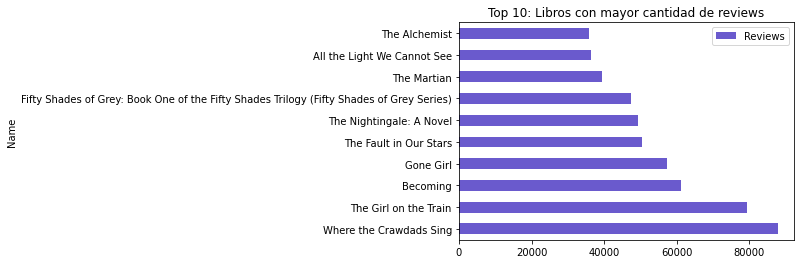

In [ ]:
media = df_base.groupby('Name').max()['Reviews']
media.reset_index().sort_values(by='Reviews', ascending = False).iloc[0:10].plot(kind='barh', x='Name',y='Reviews', color = 'slateblue')
plt.title('Top 10: Libros con mayor cantidad de reviews')

In [ ]:
mejor_rating = df_base.groupby('Name')['User Rating'].max()
print(top_libros.sort_values(ascending=False).head(28))

Name
Where the Crawdads Sing                                                                     87841
The Girl on the Train                                                                       79446
Becoming                                                                                    61133
Gone Girl                                                                                   57271
The Fault in Our Stars                                                                      50482
The Nightingale: A Novel                                                                    49288
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)    47265
The Martian                                                                                 39459
All the Light We Cannot See                                                                 36348
The Alchemist                                                                               35799
The Goldfinch: 

### •	¿Qué autores sobresalieron?

In [ ]:
top_autores = df_base.groupby('Author')['User Rating'].mean()
print(top_autores.sort_values(ascending=False).head(10))

Author
Jill Twiss               4.9
Nathan W. Pyle           4.9
Chip Gaines              4.9
Rush Limbaugh            4.9
Bill Martin Jr.          4.9
Emily Winfield Martin    4.9
Pete Souza               4.9
Patrick Thorpe           4.9
Lin-Manuel Miranda       4.9
Sherri Duskey Rinker     4.9
Name: User Rating, dtype: float64


Text(0.5, 1.0, 'Top 10: Rating de libros por Autor')

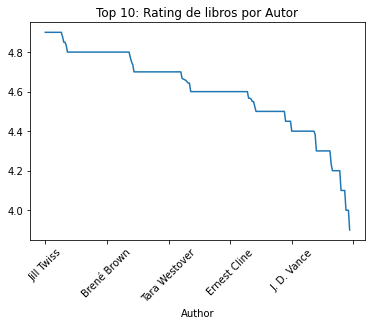

In [ ]:
top_autores = df_base.groupby('Author')['User Rating'].mean()
top_autores.sort_values(ascending=False).plot(kind= 'line', x='User Rating',y='Author')
plt.xticks(rotation = 45)
plt.title('Top 10: Rating de libros por Autor')

### •	¿Cuál es el género de libro que sobresalió?

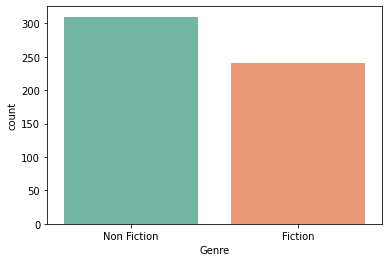

In [ ]:
sns.countplot(data=df_base, x='Genre', palette='Set2')
plt.show()

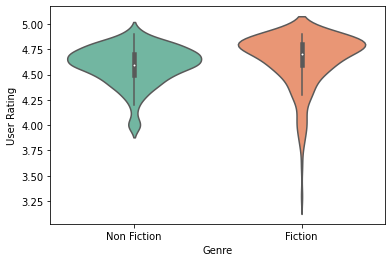

In [ ]:

sns.violinplot(data=df_base, x='Genre', y='User Rating', split=True,dodge=True, palette='Set2')
plt.show()

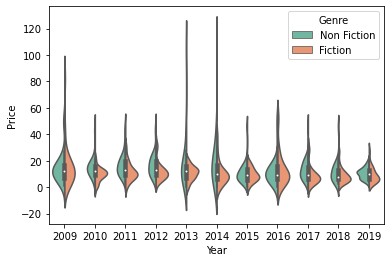

In [ ]:
sns.violinplot(data=df_base, x='Year', y='Price', hue='Genre', split=True,dodge=True, palette='Set2')
plt.show()

## Análisis de texto

In [ ]:
!pip install wordcloud==1.8.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.2/435.2 KB 27.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from wordcloud import WordCloud


In [ ]:
textos_compras = ''
for row in df_base['Name']: 
    textos_compras = textos_compras + ' ' + row

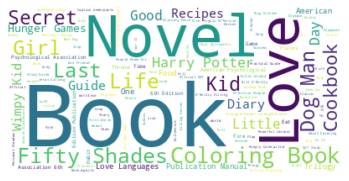

In [ ]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_compras)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51f4c30b-edb1-4e20-9f03-18f84b17f012' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>